In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/datasets/5iris.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df[['species']] = df[['species']].apply(LabelEncoder().fit_transform)
df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1:]
y_test = df_test.iloc[:, -1:]

In [ ]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)


DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.5833

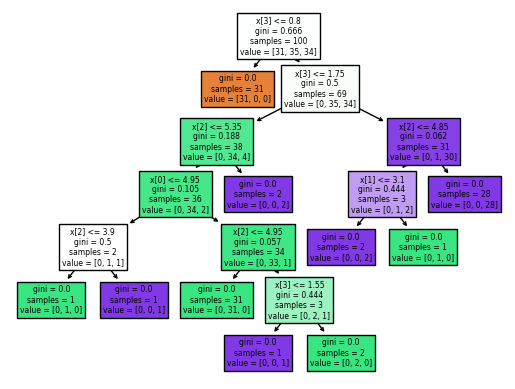

In [ ]:
from sklearn import tree
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred,y_test):.6f}')

accuracy: 1.000000


# Default Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
treemodel_post_pruning = DecisionTreeClassifier(max_depth=2)
treemodel_post_pruning.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
treemodel_post_pruning.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

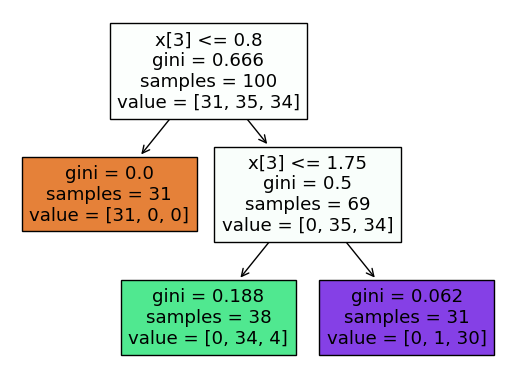

In [ ]:

tree.plot_tree(treemodel_post_pruning,filled=True)


In [ ]:
y_pred_post_pruning =treemodel_post_pruning.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_post_pruning,y_test):.6f}')


accuracy: 0.980000


# PostPruning Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred_post_pruning,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treemodel_pre_pruninig=DecisionTreeClassifier()
cv=GridSearchCV(treemodel_pre_pruninig,param_grid=parameter,cv=5,scoring='accuracy')


In [ ]:
cv.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

In [ ]:
y_pred_pre_pruning=cv.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_pre_pruning,y_test):.6f}')

accuracy: 0.980000


# PrePruning Decision Tree Report

In [ ]:
print(classification_report(y_pred_pre_pruning,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
treemodel_cost_complexity=DecisionTreeClassifier()
path = treemodel_cost_complexity.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
ccp_alphas

array([0.        , 0.00944444, 0.00967742, 0.03380117, 0.25399375,
       0.32087246])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.32087246376811596


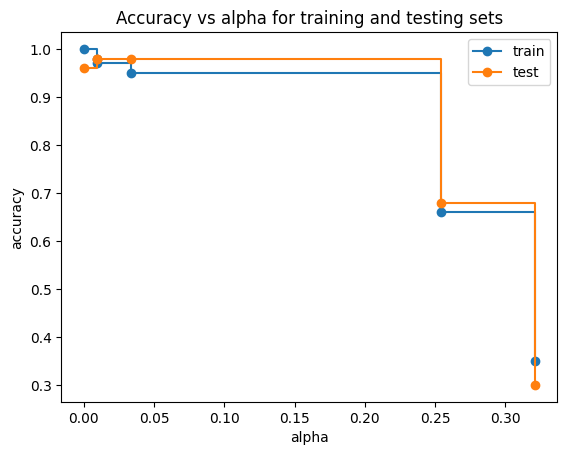

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
treemodel_cost_complexity = DecisionTreeClassifier(random_state=0, ccp_alpha=0.10)
treemodel_cost_complexity.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.1, random_state=0)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

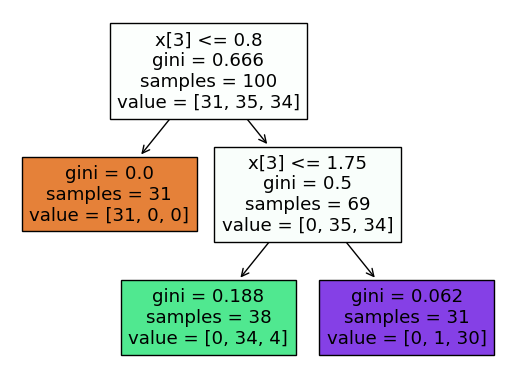

In [ ]:
tree.plot_tree(treemodel_cost_complexity,filled=True)

In [ ]:
y_pred_cost_complexity=treemodel_cost_complexity.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred_cost_complexity,y_test):.6f}')


accuracy: 0.980000


# Cost Complexity Decision Tree Report

In [ ]:
print(classification_report(y_pred_cost_complexity,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Proposed Algorithm 1

In [ ]:
pip install chefboost

In [ ]:
from chefboost.training import Training

def findGain(threshold, d, column):
  idx = d[d[column] <= threshold].index
  tmp_d = d.copy()
  tmp_d[column] = '>' + str(threshold)
  tmp_d.loc[idx, column] = '<=' + str(threshold)
  config = {'algorithm': 'CART'}
  gain = Training.findGains(tmp_d, config)['gains'][column]
  return gain

In [ ]:
def change_to_class(columns, decision):
  binary_selection = {}
  for column in columns:
    df_temp = df_train.copy()
    df_temp = df_temp[[column, decision]]
    df_temp.rename(columns={decision : "Decision"}, inplace=True)
    uniques_values = sorted(df_temp[column].unique())
    theresold, mx_gain = 0, 1
    for i in uniques_values:
      gain = findGain(i, df_temp, column)
      if (mx_gain > gain):
        theresold = i
        mx_gain = gain
    binary_selection[column] = theresold
  return binary_selection
    # idx = classified_df[classified_df[column] <= mx_theresold].index
    # classified_df[column] = '>' + str(mx_theresold)
    # classified_df.loc[idx, column] = '<=' + str(mx_theresold)

In [ ]:
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
binary_selection = change_to_class(numerical_features, 'species')
print(binary_selection)

{'sepal_length': 5.4, 'sepal_width': 3.0, 'petal_length': 1.9, 'petal_width': 0.6}


In [ ]:
class SelectRootDecisionTree():
  def __init__(self, criterion = "gini", max_depth = 20):
    self.criterion = criterion
    self.max_depth = max_depth

  def fit(self, X):
    self.X = X.copy();

  def predict(self, X_test):
    X_sub = {}
    DT_set = {}
    for feature in self.X.columns[0: -1]:
      X_sub[feature] = {}
      DT_set[feature] = {}
      if feature in numerical_features:
        X_sub[feature][0] = self.X[self.X[feature] < binary_selection[feature]].drop([feature], axis=1)
        X_sub[feature][1] = self.X[self.X[feature] >= binary_selection[feature]].drop([feature], axis=1)
        DT_set[feature][0] = DecisionTreeClassifier(max_depth = self.max_depth)
        Y_Sub = X_sub[feature][0].iloc[:,-1:]
        X_temp = X_sub[feature][0].iloc[:,:-1]
        DT_set[feature][0] = DT_set[feature][0].fit(X_temp, Y_Sub)
        DT_set[feature][1] = DecisionTreeClassifier(max_depth = self.max_depth)
        Y_Sub = X_sub[feature][1].iloc[:,-1:]
        X_temp = X_sub[feature][1].iloc[:,:-1]
        DT_set[feature][1] = DT_set[feature][1].fit(X_temp, Y_Sub)
      else:
        for label in np.unique(self.X[feature].values):
          X_sub[feature][label] = self.X[self.X[feature].eq(label)].drop([feature], axis=1)
          DT_set[feature][label] = DecisionTreeClassifier(max_depth = self.max_depth)
          Y_Sub = X_sub[feature][label].iloc[:,-1:]
          X_temp = X_sub[feature][label].iloc[:,:-1]
          DT_set[feature][label] = DT_set[feature][label].fit(X_temp, Y_Sub)

    predictions = []
    target = self.X.columns[-1:][0]
    # res = DT_set['Outlook'][1].predict(pd.DataFrame([row[1]],columns=X_test.columns).drop(['Outlook'], axis=1))

    for feature in X_test.columns:
      prediction = []
      for row in X_test.iterrows():
        label = row[1][feature]
        if feature in numerical_features:
          label = row[1][feature] >= binary_selection[feature]
        if X_sub[feature][label].empty:
          prediction.append(0)
          continue;

        decisions = np.unique(X_sub[feature][label][target].values);
        if (len(decisions) == 1):
          prediction.append(decisions[0]);
          continue
        test_data = pd.DataFrame([row[1]],columns=X_test.columns).drop([feature], axis=1)
        res = DT_set[feature][label].predict(test_data)
        prediction.append(res[0])
      predictions.append(prediction)
    return predictions;
    #     prediction.append()



In [ ]:
proposed_algo_1_dt = SelectRootDecisionTree(max_depth = 4)
proposed_algo_1_dt.fit(df_train)
y_pred_proposed_algo_1 = proposed_algo_1_dt.predict(X_test)
print(y_pred_proposed_algo_1)

[[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2], [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2], [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2], [1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2]]


In [ ]:
from sklearn.metrics import recall_score
mx_recal, proposed_algo_result = 0, []
for feature_pred in y_pred_proposed_algo_1:
  # print(feature_dt)
  # print(y_test_proposed_algo_1)
  recall = recall_score(y_test_proposed_algo_1, feature_pred, average='macro')
  if (recall > mx_recal):
    proposed_algo_result = feature_pred
    mx_recal = recall
print(mx_recal)

1.0


In [ ]:
print(f'accuracy: {accuracy_score(proposed_algo_result, y_test_proposed_algo_1):.6f}')

accuracy: 1.000000


In [ ]:
print(classification_report(proposed_algo_result, y_test_proposed_algo_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

